In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [3]:
def user_info():
    first_name =input("Enter your first name: ")
    last_name=input("Enter your last name: ")
    gender=input("Enter your gender: ")
    user_id =input("Enter your user ID (3 numbers only): ")
    while not (user_id.isdigit() and len(user_id) == 3):
        user_id = input("Enter ID (3 numbers): ")
        if not (user_id.isdigit() and len(user_id) == 3):
            print("Error: ID must be exactly 3 digits.")
    file_name=f"{first_name}_{last_name}_info.txt"
    with open(file_name, "w") as file:
        file.write(f"First Name: {first_name}\n")
        file.write(f"Last Name: {last_name}\n")
        file.write(f"Gender: {gender}\n")
        file.write(f"User ID: {user_id}\n")
user_info()
    
    

In [26]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.9.1
torchvision version: 0.24.1


In [27]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [29]:
device = "cuda" if torch.cuda.is_available() else "mps"
device

'mps'

In [30]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

In [31]:
# Setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

print(f"Train dir: {train_dir}")
print(f"Test dir: {test_dir}")

Train dir: data/pizza_steak_sushi/train
Test dir: data/pizza_steak_sushi/test


In [32]:
train_dir =image_path /"train"
test_dir =image_path /"test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [33]:
from going_modular.going_modular import data_setup
IMAGE_SIZE =224
manual_transforms = transforms.Compose([ transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),transforms.ToTensor() ])

In [34]:
from going_modular.going_modular import data_setup
from torchvision import transforms

# 1. Define the transform (Recalling the fix: Capital 'R' for Resize)
IMAGE_SIZE = 224
manual_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# 2. Create DataLoaders using the paths you just defined
BATCH_SIZE = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

# 3. Check the output
print(f"Class names: {class_names}")
print(f"Train dataloader length: {len(train_dataloader)}")
print(f"Test dataloader length: {len(test_dataloader)}")

Class names: ['pizza', 'steak', 'sushi']
Train dataloader length: 8
Test dataloader length: 3


In [35]:
import shutil
from pathlib import Path
from going_modular.going_modular import data_setup # Import your custom module

# 1. Force delete the existing data folder to clear the error
data_path = Path("data/pizza_steak_sushi")
if data_path.exists():
    shutil.rmtree(data_path)
    print(f"Deleted corrupted directory: {data_path}")

# 2. Re-download the data (Copying the download function logic here to ensure it runs)
import requests
import zipfile

# Setup path to data folder
data_root = Path("data/")
image_path = data_root / "pizza_steak_sushi"
image_path.mkdir(parents=True, exist_ok=True)

# Download
with open(data_root / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip
with zipfile.ZipFile(data_root / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# 3. Define paths again
train_dir = image_path / "train"
test_dir = image_path / "test"

# 4. Create DataLoaders immediately to verify it works
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # Uses the transforms we fixed earlier
    batch_size=32
)

print("\nSuccess! Data loaded.")
print(f"Classes found: {class_names}")

Deleted corrupted directory: data/pizza_steak_sushi
Unzipping pizza, steak, sushi data...

Success! Data loaded.
Classes found: ['pizza', 'steak', 'sushi']


In [36]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # Uses the transforms we fixed earlier
    batch_size=32
)
len(train_dataloader), len(test_dataloader), class_names

(8, 3, ['pizza', 'steak', 'sushi'])

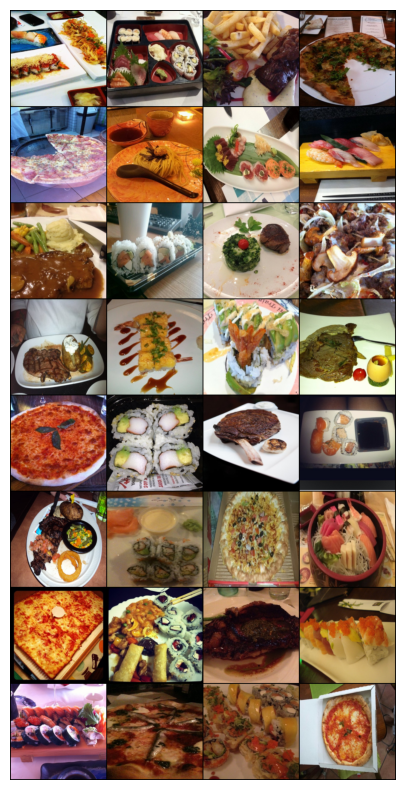

(8, 3, ['pizza', 'steak', 'sushi'])

In [43]:
#Visualize some data
import matplotlib.pyplot as plt
# Get a batch of images and labels
image, labels = next(iter(train_dataloader))
# Create a grid of images
img_grid = torchvision.utils.make_grid(image, nrow=4)
# Plot the grid
plt.figure(figsize=(10,10))
plt.imshow(img_grid.permute(1, 2, 0))  # Change from
plt.axis('off')
plt.show()  
len(train_dataloader), len(test_dataloader), class_names


In [38]:
# Set random seeds for reproducibility
set_seeds(42)

In [39]:
# Replicate the model architecture from the paper
height=224
width = 224
color_channels= 3
patch_size=16
number_of_patches=int((height*width)/patch_size**2)


In [44]:
#input_shape
embedding_layer_input_shape=(height,width,color_channels)
# output chape
embedding_layer_output_shape=(number_of_patches,patch_size**2 * color_channels)

print(f"Input shape(Single 2D image):{embedding_layer_input_shape}")
print(f"Output shape(after patching and flattening):{embedding_layer_output_shape}")

Input shape(Single 2D image):(224, 224, 3)
Output shape(after patching and flattening):(196, 768)


In [41]:
!pip install matplotlib

In [46]:
import matplotlib.pyplot as plt
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

image_permuted=image_permuted(1,2,0)

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 4 is not equal to len(dims) = 3

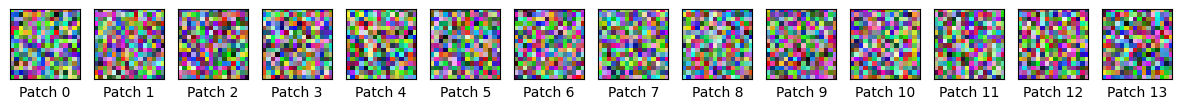

In [47]:
import torch
import matplotlib.pyplot as plt

# 1. إعداد المتغيرات الأساسية
image_size = 224
patch_size = 16

# 2. إنشاء المتغير المفقود 'image' (تنسور عشوائي يمثل صورة)
# الأبعاد في PyTorch تكون: (القنوات اللونية، الارتفاع، العرض)
image = torch.rand(3, image_size, image_size) 

# 3. السطر الذي كان يعطيك الخطأ (الآن سيعمل لأن 'image' موجود)
# نقوم بتغيير الترتيب ليكون (الارتفاع، العرض، القنوات) ليفهمه matplotlib
image_permuted = image.permute(1, 2, 0).numpy()

# 4. باقي الكود الخاص بك
num_patches = (image_size * image_size) // (patch_size**2)
assert image_size % patch_size == 0 

# إنشاء الرسم
fig, axs = plt.subplots(nrows=1, ncols=image_size // patch_size, 
                        figsize=(15, 2), # قمت بتكبير حجم الرسم قليلاً للوضوح
                        sharex=True, sharey=True)

for i, patch in enumerate(range(0, image_size, patch_size)):
    # هنا يتم عرض المربعات القُطرية (Diagonal)
    axs[i].imshow(image_permuted[patch:patch+patch_size, patch:patch+patch_size, :])
    axs[i].set_xlabel(f"Patch {i}") # تسمية للتوضيح
    axs[i].set_xticks([]) # إخفاء الأرقام للمظهر الجمالي
    axs[i].set_yticks([])
    axs[i].imshow(image_permuted[patch:patch+patch_size, patch:patch+patch_size, :])
    axs[i].set_xlabel(f"Patch {i}") # تسمية للتوضيح
    axs[i].set_xticks([]) # إخفاء الأرقام للمظهر الجمالي
    axs[i].set_yticks([])

plt.show()

In [48]:
image_batch,label_batch= next(iter(train_dataloader))
image, label=image_batch[0], label_batch[0]
image.shape,label

(torch.Size([3, 224, 224]), tensor(0))

In [49]:
img_size=224
patch_size=16
num_patches=(img_size*img_size)//(patch_size**2)
assert img_size % patch_size ==0
#img_size,patch_size,num_patches



In [50]:
# Create subpolts
fig , axs =plt.subplots( nrows=img_size // patch_size,ncols=img_size // patch_size, figsize=(num_patches,num_patches),sharex=True, sharey=True)
#loop through rows and columns of subplots
for i ,patch_hight in enumerate(range(0,img_size,patch_size)):
    for j ,patch_width in enumerate(range(0,img_size,patch_size)):
        axs[i,j].imshow(image.permute(1,2,0)[patch_hight:patch_hight +patch_size, patch_width:patch_width +patch_size,:])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

In [51]:
from torch import nn 
patch_size= 16
conv2d= nn.Conv2d(in_channels =3 ,out_channels =768,kernel_size=patch_size,stride=patch_size)
conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

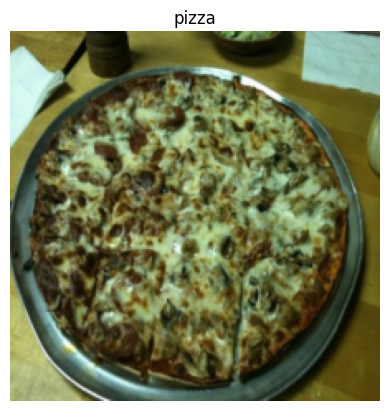

In [52]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

In [53]:
image_out_of_conv=conv2d(image.unsqueeze(0))
image_out_of_conv.shape

torch.Size([1, 768, 14, 14])

In [54]:
image_out_of_conv.requires_grad

True

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


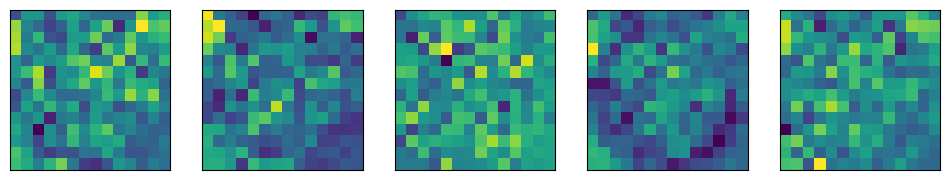

In [55]:
import random 
reandom_indexs=random.sample(range(0,758),k=5)
fig ,axs = plt.subplots(nrows=1,ncols=5 ,figsize=(12,12))
for i ,idx in enumerate(reandom_indexs):
    image_conv_feature_map=image_out_of_conv[:,idx,:,:]
    axs[i].imshow(image_conv_feature_map.detach().squeeze().numpy())
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    

In [56]:
single_feature_map=image_out_of_conv[:,0,:,:]
single_feature_map.shape

torch.Size([1, 14, 14])

In [57]:
flatten_layer=nn.Flatten(start_dim=2,end_dim=3)
flatten_layer(image_out_of_conv)

tensor([[[ 0.0507,  0.0215,  0.0683,  ...,  0.1199,  0.0566,  0.0427],
         [ 0.2818,  0.0137,  0.0379,  ...,  0.1057,  0.0599,  0.0093],
         [ 0.3378,  0.3023,  0.1026,  ...,  0.1544,  0.1695,  0.1368],
         ...,
         [-0.0233, -0.0242, -0.1753,  ..., -0.0290, -0.0605, -0.0541],
         [-0.1229,  0.0100, -0.0532,  ...,  0.0467,  0.0434,  0.0434],
         [-0.0151, -0.0389, -0.0988,  ...,  0.0574, -0.0432, -0.0530]]],
       grad_fn=<ViewBackward0>)

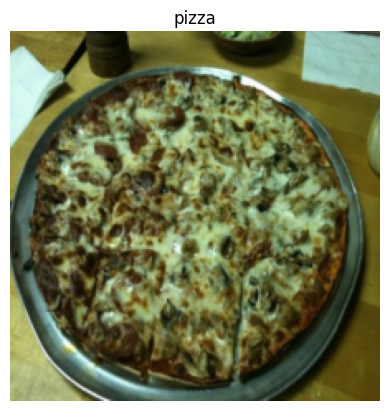

In [58]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);
image_out_of_conv=conv2d(image.unsqueeze(0))
image_out_of_conv_flattened=flatten_layer(image_out_of_conv)

In [59]:
image_out_of_conv_flattened_permuted=image_out_of_conv_flattened.permute(0,2,1)

In [60]:
single_flatten_map=image_out_of_conv_flattened_permuted[:,:,0]
single_flatten_map

tensor([[ 5.0703e-02,  2.1530e-02,  6.8277e-02,  3.3560e-02,  6.0339e-02,
         -5.2671e-03, -4.3192e-03,  6.6251e-02, -3.1768e-02, -6.7087e-02,
          2.4254e-02, -5.6433e-02, -1.6237e-01,  1.4146e-02, -1.1538e-01,
          1.3682e-02,  1.0468e-01,  7.2938e-02,  3.1759e-02,  4.0932e-02,
         -1.3137e-01, -8.1012e-02,  1.4602e-01,  8.4023e-02,  9.4193e-02,
         -8.1114e-02, -1.0007e-01, -7.8415e-02, -7.8219e-02, -1.1585e-01,
          6.3460e-02, -6.9463e-02, -5.8353e-02,  5.3025e-02,  1.9955e-03,
         -1.7744e-02,  1.2331e-01, -3.3433e-01, -1.2393e-02,  8.3430e-02,
          1.3553e-02, -8.6220e-02,  3.4993e-02,  3.1668e-02, -2.8745e-02,
          2.4557e-02, -5.9522e-02, -7.2577e-02, -5.8024e-02,  8.4232e-03,
          6.6418e-02, -3.5430e-02,  5.1451e-02,  2.4494e-02,  4.0169e-02,
          5.4866e-04, -3.0354e-02,  2.1735e-03, -1.7618e-02, -2.9067e-02,
         -6.6411e-04,  7.0334e-03, -1.2523e-01, -4.5607e-02,  1.3744e-03,
         -7.6419e-02, -1.1624e-02,  1.

In [61]:
plt.figure(figsize=(22,22))
plt.imshow(single_flatten_map.detach().numpy())
plt.axis(False);

In [62]:
class PatchEmbedding(nn.Module):
    def __init__ (self,in_channels:int =3,patch_size:int=16,embedding_dim:int=768):
        super().__init__()
        self.patcher= nn.Conv2d(in_channels=in_channels,out_channels=embedding_dim,kernel_size=patch_size,stride=patch_size,padding=0)
        self.flatten=nn.Flatten(start_dim=2,end_dim=3)
    def forward(self,x):
        image_resolution=x.shape[-1]
        assert image_resolution % patch_size==0 , f"Image resolution {image_resolution} must be divisible by patch size {patch_size}"
        x_patched =self.patcher(x)
        x_flattened=self.flatten(x_patched)
        
        return x_flattened.permute(0,2,1)  # (batch_size, num_patches, embedding_dim)

In [65]:
set_seeds(42)
patchify=PatchEmbedding(in_channels=3,patch_size=16,embedding_dim=768)
patch_embedding_output=patchify(image.unsqueeze(0))
patch_embedding_output.shape

torch.Size([1, 196, 768])